<a href="https://colab.research.google.com/github/Labdhiiii/Multilingual-Text-Recognization-and-Translation/blob/main/multilingual_textrecognization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install easyocr --no-deps

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 27.8 MB/s eta 0:00:00


In [5]:
!pip install python-bidi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.9/292.9 kB 5.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
easyocr 1.7.2 requires ninja, which is not installed.
easyocr 1.7.2 requires pyclipper, which is not installed.


In [6]:
import easyocr

In [7]:
reader = easyocr.Reader(['hi','en'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

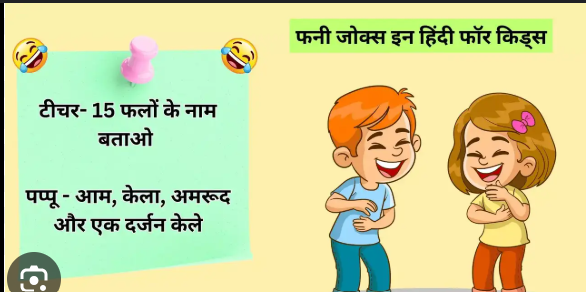

In [8]:
import PIL
im = PIL.Image.open('/content/text.png') #provide your image path
im

In [9]:
bounds = reader.readtext('/content/text.png', detail=0)
#detail=0 argument will only give text in array
print("Output:")
print(bounds)

Output:
['जोक्स इन हिंदी फॉर किड्स', 'टीचर- २५ फलों के नाम', 'बताओ', 'पप्पू - आम,', 'अमरूद', 'और एक दर्जन केले', 'फनी', 'केला,']


In [11]:
bounds = reader.readtext('/content/text.png', detail=1) #detail=1 argument will only give text with its position in an image
bounds


[([[np.int32(332), np.int32(20)],
   [np.int32(551), np.int32(20)],
   [np.int32(551), np.int32(52)],
   [np.int32(332), np.int32(52)]],
  'जोक्स इन हिंदी फॉर किड्स',
  np.float64(0.8355127174960073)),
 ([[np.int32(36), np.int32(94)],
   [np.int32(220), np.int32(94)],
   [np.int32(220), np.int32(122)],
   [np.int32(36), np.int32(122)]],
  'टीचर- २५ फलों के नाम',
  np.float64(0.46891223664315357)),
 ([[np.int32(94), np.int32(124)],
   [np.int32(156), np.int32(124)],
   [np.int32(156), np.int32(150)],
   [np.int32(94), np.int32(150)]],
  'बताओ',
  np.float64(0.5298204901025175)),
 ([[np.int32(22), np.int32(186)],
   [np.int32(120), np.int32(186)],
   [np.int32(120), np.int32(212)],
   [np.int32(22), np.int32(212)]],
  'पप्पू - आम,',
  np.float64(0.6430473976330162)),
 ([[np.int32(169), np.int32(187)],
   [np.int32(233), np.int32(187)],
   [np.int32(233), np.int32(207)],
   [np.int32(169), np.int32(207)]],
  'अमरूद',
  np.float64(0.997478511779538)),
 ([[np.int32(50), np.int32(208)],
   [

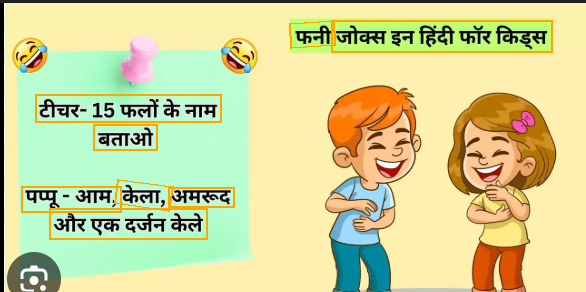

In [12]:
# !pip install pillow
from PIL import Image, ImageDraw
# Draw bounding boxes
def draw_boxes(image, bounds, color='orange', width=2):
  draw = ImageDraw.Draw(image)
  for bound in bounds:
    p0, p1, p2, p3 = bound[0]
    draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
  return image

draw_boxes(im, bounds)

In [13]:
!pip install deep-translator


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.8 MB/s eta 0:00:00


In [14]:
from deep_translator import GoogleTranslator

# Extract only the text from the bounds list
extracted_text = [item[1] for item in bounds]  # Extract the text part only

# Translate the recognized text
def translate_text(text_list, target_language='en'):
    translations = []
    for line in text_list:
        # Translate each line of text to the target language
        translation = GoogleTranslator(source='auto', target=target_language).translate(line)
        translations.append(translation)
    return translations

# Get user input for target language (e.g., 'en' for English, 'fr' for French)
target_language = input("Enter target language (e.g., 'en' for English, 'fr' for French, etc.): ")

# Translate the extracted text
translated_text = translate_text(extracted_text, target_language)

# Display original and translated text
print("Original Text:")
print(extracted_text)
print("Translated Text:")
print(translated_text)


Enter target language (e.g., 'en' for English, 'fr' for French, etc.): en
Original Text:
['जोक्स इन हिंदी फॉर किड्स', 'टीचर- २५ फलों के नाम', 'बताओ', 'पप्पू - आम,', 'अमरूद', 'और एक दर्जन केले', 'फनी', 'केला,']
Translated Text:
['Jokes in Hindi for Kids', 'Teacher- 25 fruit names', 'Tell', 'Pappu - Mango,', 'Guava', 'And a dozen bananas', 'Funny', 'Made,']
